In [1]:
import numpy as np
from gasp import responses, simulation

In [2]:
width = 256
height = 256
alpha = np.deg2rad(10)
gradient = 1 * np.pi

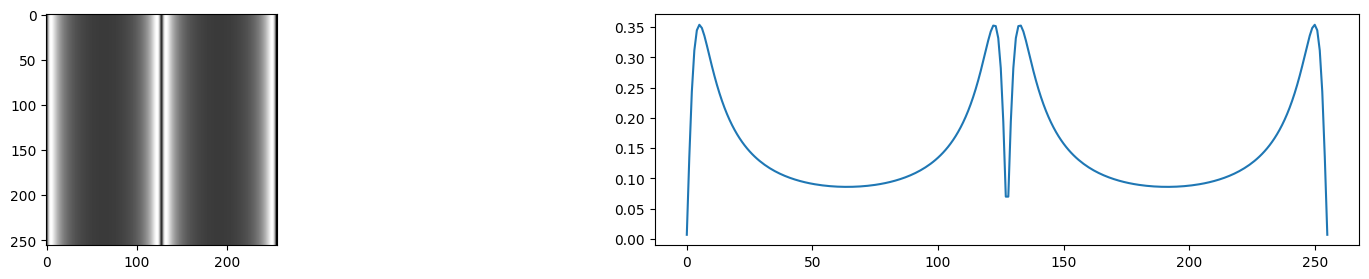

In [3]:
M = simulation.simulate_ssfp(alpha = alpha, gradient = gradient)
simulation.view_gasp_input(M)

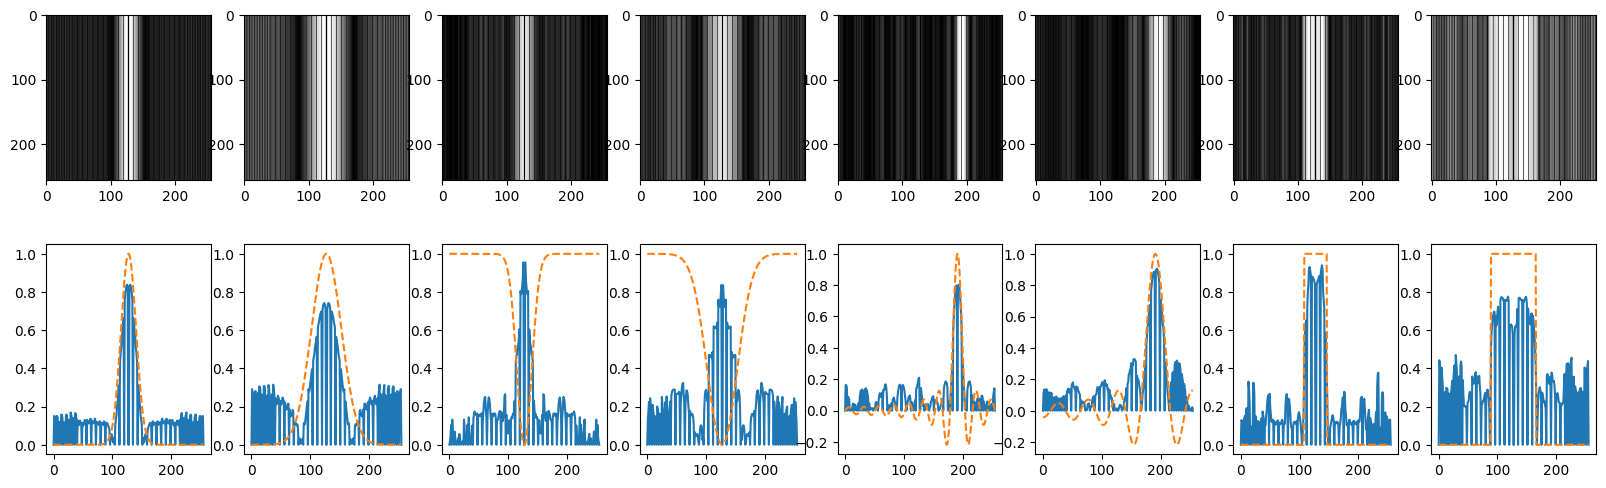

In [4]:
D = []
D.append(responses.gaussian(width, bw=0.2, shift=0))
D.append(responses.gaussian(width, bw=0.4, shift=0))
D.append(responses.notch(width, bw=0.2, shift=0))
D.append(responses.notch(width, bw=0.4, shift=0))
D.append(responses.sinc(width, bw=0.1, shift=0.5))
D.append(responses.sinc(width, bw=0.2, shift=0.5))
D.append(responses.square(width, bw=0.15, shift=0))
D.append(responses.square(width, bw=0.3, shift=0))

G = []
A = []
for d in D:
    Ic, M, An = simulation.simulate_gasp(d, alpha = alpha, gradient = gradient)
    G.append(Ic)
    A.append(An)

simulation.view_gasp_comparison(G, D)

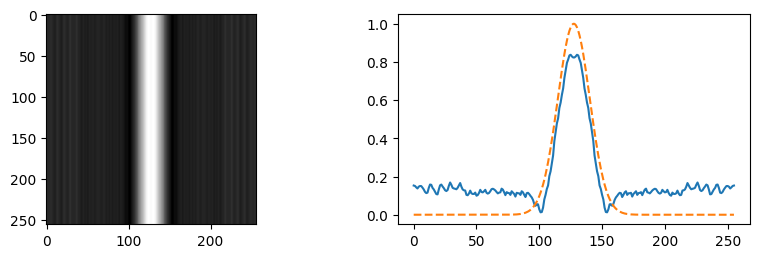

In [5]:
import numpy as np
import matplotlib.pyplot as plt

M = simulation.simulate_ssfp(alpha = alpha, gradient = gradient)
M = np.reshape(M,(M.shape[0], M.shape[0], -1))
I = simulation.evaluate_gasp(M, A[0][0])

simulation.view_gasp(I, D[0])